In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score



from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,f1_score,roc_curve, roc_auc_score


In [2]:
url= r'/content/default of credit card clients.xls'
dataset= pd.read_excel(url, skiprows=1)

In [3]:
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
# Dataset Rows & Columns count
dataset.shape

(30000, 25)

In [5]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [6]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].count()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [7]:
# Missing Values/Null Values Count
dataset[dataset.isna()].count()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [8]:
# Dataset Columns
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [9]:
# Dataset Describe
dataset.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
#converting all 0,4,5,6 value on education to 4
dataset['EDUCATION']=dataset['EDUCATION'].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

#Converting 0 in marriage to 3
dataset['MARRIAGE']=dataset['MARRIAGE'].map({0:3,1:1,2:2,3:3})

#Function to divide limit column into categorical variable for visualization
def limit_cat(x):
  if x >240000:
    return 'Above 240000'
  elif x >140000 :
    return 'Between 140000-240000'
  elif x >10000:
    return 'Between 10000-140000'
  else:
    return

#Function for dividing age column into categorical variable for visualization
def age_cat(x):
  if x >45:
    return 'Above 45'
  elif x > 35:
    return '35-45'
  else:
    return '21-35'

#creating new categorical variable.
dataset['Limit_cat'] = dataset['LIMIT_BAL'].apply(lambda x:limit_cat(x))

#creating new categorical variable.
dataset['Age_cat'] = dataset['AGE'].apply(lambda x: age_cat(x))

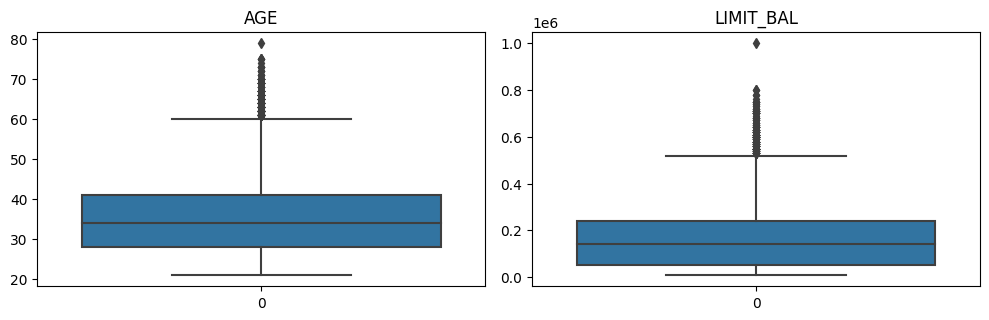

In [11]:
# checking Outliers with seaborn boxplot

plt.figure(figsize=(10,6))
n=0
for i in ['AGE','LIMIT_BAL']:
  if n<10:
    n=n+1
  plt.subplot(2,2,n)
  sns.boxplot(dataset[i],whis=1.5)
  plt.title(i)
  plt.tight_layout()

**Data Visualisation and Plots**


---



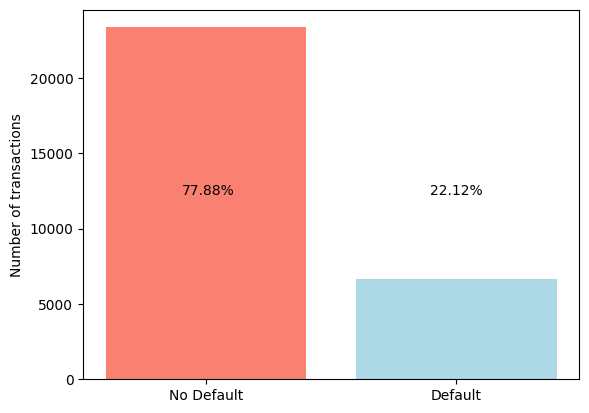

In [12]:
#Calculating percentage of defaulters and non defaulters
classes=dataset['default'].value_counts()
not_default=classes[0]/dataset['default'].count()*100
defaulter=classes[1]/dataset['default'].count()*100


#Barplot of percentage of defaulters vs non defaulters.
plt.bar(['No Default','Default'], classes, color=['salmon','lightblue'])
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(not_default),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(defaulter),(0.7, 0.5), xycoords='axes fraction')
plt.show()

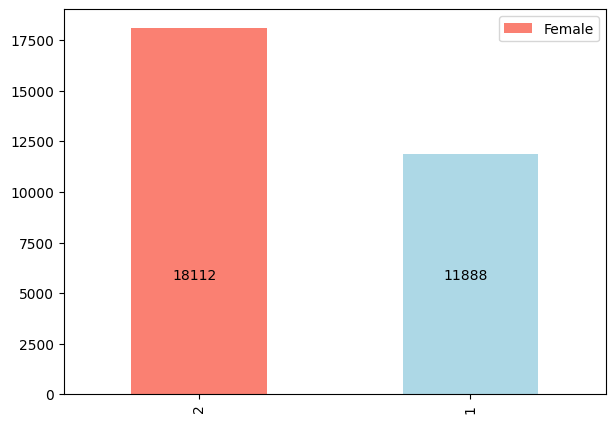

In [13]:
#Barplot of number of Male vs Female customers
dataset['SEX'].value_counts().plot(kind="bar",figsize=(7,5),color=['salmon','lightblue'])

#Calculating annotated vales
sex_df=dataset['SEX'].value_counts().reset_index()
female=sex_df['SEX'][0]
male=sex_df['SEX'][1]
plt.annotate("{}".format(female),(0.2, 0.3), xycoords='axes fraction')
plt.annotate("{}".format(male),(0.7, 0.3), xycoords='axes fraction')
plt.legend(['Female','Male'])
plt.show()

<Axes: ylabel='Frequency'>

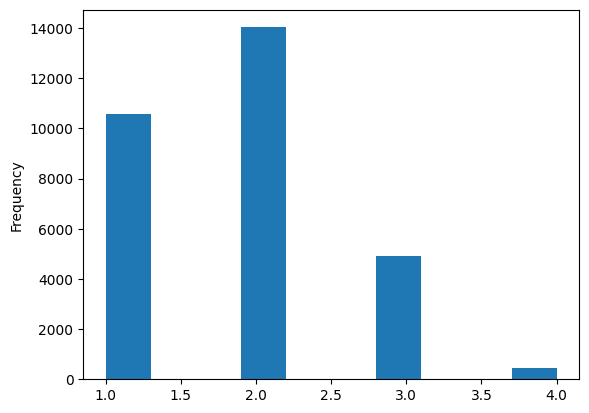

In [14]:
#Bargraph showing number of customer as per education.
dataset.EDUCATION.plot.hist()

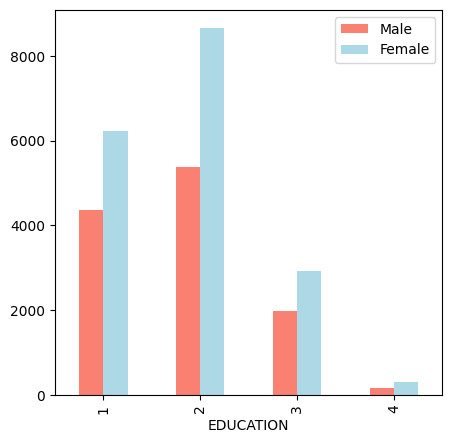

In [15]:
#Gender wise distribution of number of customer by education.
dataset.groupby('EDUCATION')['SEX'].value_counts().unstack().plot(kind="bar",figsize=(5,5),color=['salmon','lightblue'])
plt.legend(['Male','Female'])
plt.show()

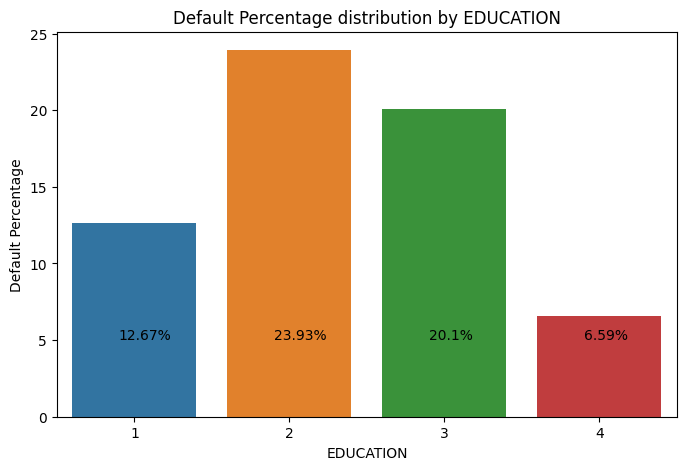

In [16]:
#Bar graph showing default percentage as per education.

dataset["EDUCATION"].value_counts()
df=dataset.groupby("EDUCATION")['default'].sum().reset_index()
df.rename(columns = {'default':'Default Percentage'}, inplace = True)
for i in range(dataset["EDUCATION"].nunique()):
    df['Default Percentage'][i]=round(df['Default Percentage'][i]/(df['Default Percentage'][i]+dataset["EDUCATION"].value_counts().reset_index()["EDUCATION"][i]),4)*100
#for plotting bar graph
fig = plt.subplots(figsize=(8,5))
sns.barplot(x ='EDUCATION',y ='Default Percentage',data = df).set_title('Default Percentage distribution by EDUCATION')
for i in range(df['Default Percentage'].nunique()):
   plt.annotate("{}%".format(df['Default Percentage'][i]),(0.1+i*0.25, 0.2), xycoords='axes fraction')

#plt.legend(df[x])
plt.show()

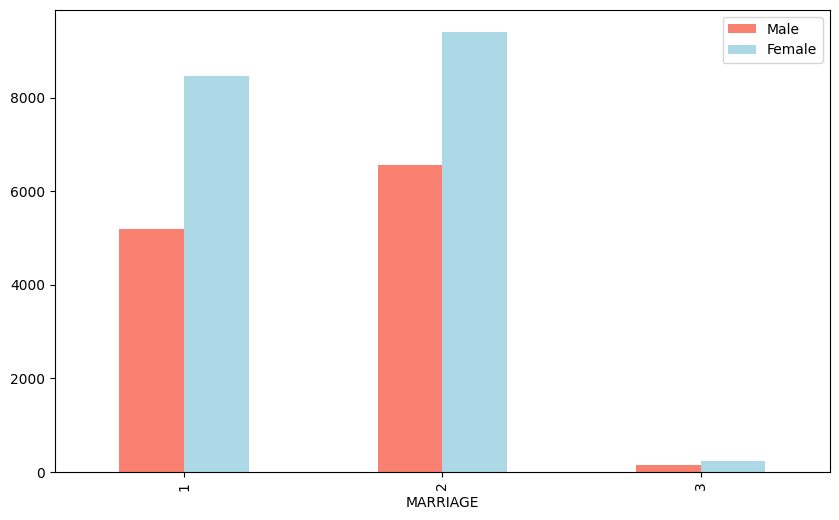

In [17]:
#Bargraph showing number of customers as per their maritial status
dataset.groupby('MARRIAGE')['SEX'].value_counts().unstack().plot(kind="bar",figsize=(10,6),color=['salmon','lightblue'])
plt.legend(['Male','Female'])
plt.show()

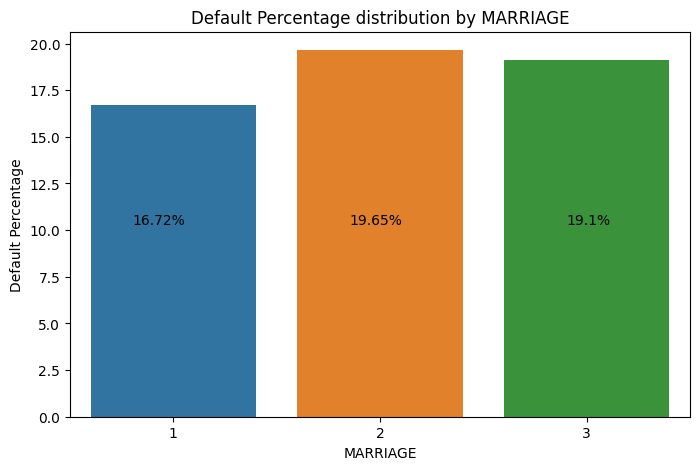

In [18]:
#Bargraph showing default percentage as per their mariatial status.
dataset['MARRIAGE'].value_counts()
df=dataset.groupby('MARRIAGE')['default'].sum().reset_index()
df.rename(columns = {'default':'Default Percentage'}, inplace = True)
for i in range(dataset['MARRIAGE'].nunique()):
    df['Default Percentage'][i]=round(df['Default Percentage'][i]/(df['Default Percentage'][i]+dataset['MARRIAGE'].value_counts().reset_index()['MARRIAGE'][i]),4)*100
#for plotting bar graph
fig = plt.subplots(figsize=(8,5))
sns.barplot(x ='MARRIAGE',y ='Default Percentage',data = df).set_title('Default Percentage distribution by MARRIAGE')
for i in range(df['Default Percentage'].nunique()):
   plt.annotate("{0:.4}%".format(df['Default Percentage'][i]),(0.1+i*0.35, 0.5), xycoords='axes fraction')

#plt.legend(df[x])
plt.show()

<ipython-input-19-54e33b83c988>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = dataset.corr()


<Axes: >

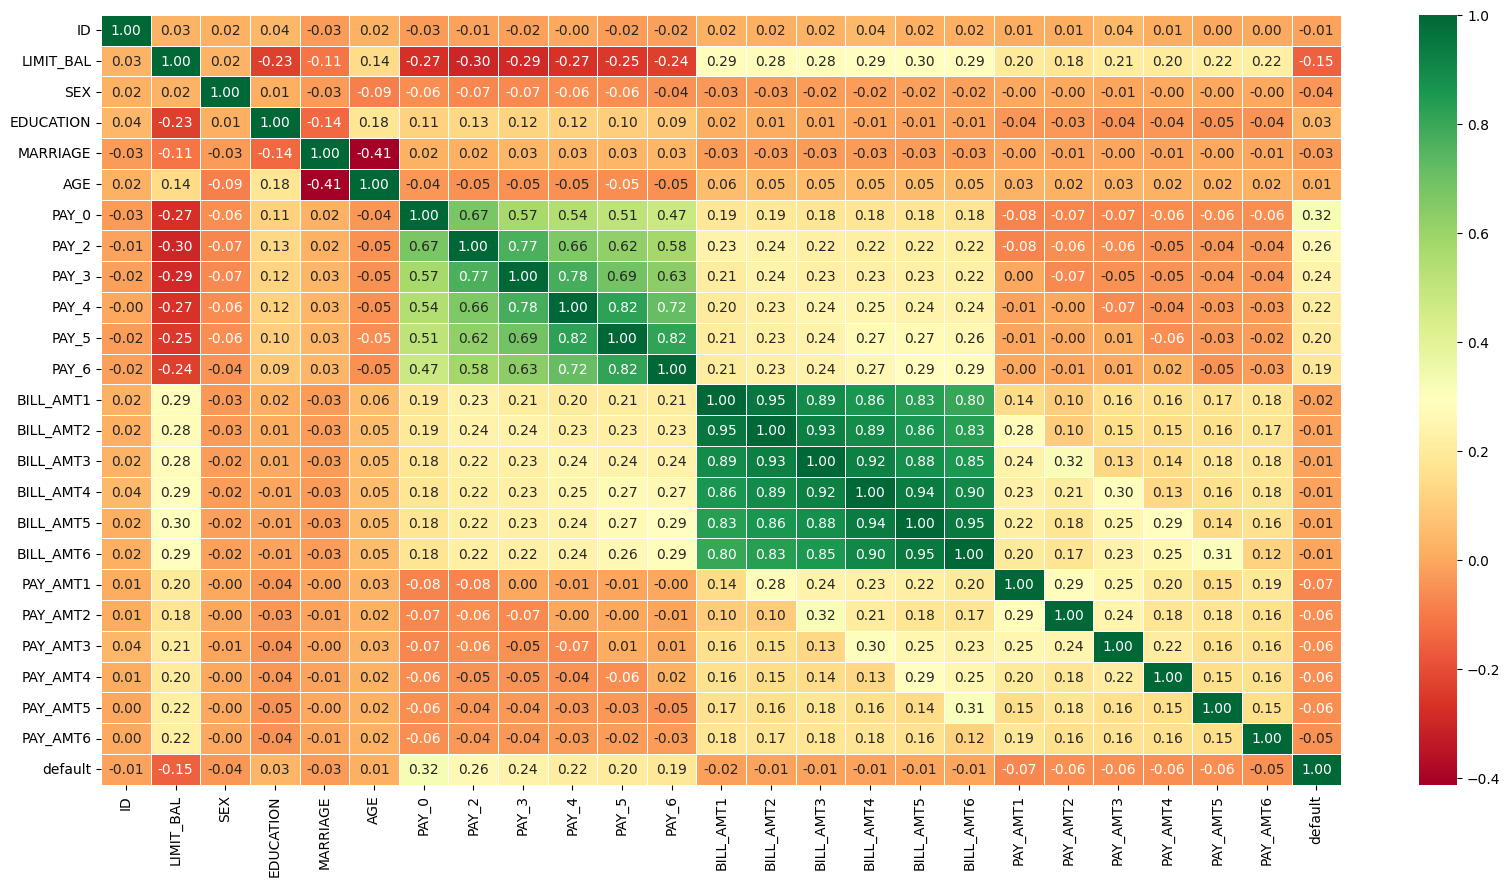

In [19]:
# Correlation Heatmap visualization code
corrmat = dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(dataset[corrmat.index].corr(),annot=True,linewidths=0.5,fmt='.2f',cmap="RdYlGn")

**HYPOTHESIS TESTING**

**H0(null hypothesis)**: There is no significant difference in the age with respect to default payment next month.

**H1(alternate hypothesis)**: There is significant difference in the age with respect to default payment next month.

In [20]:
from scipy.stats import ttest_ind

default=dataset[dataset['default']==1]
not_default=dataset[dataset['default']==0]

p_val= ttest_ind(default['AGE'],not_default['AGE']).pvalue
print(p_val)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

0.016136845890163835
We are rejecting null hypothesis


**H0(null hypothesis)**: There is no significant difference in the limit balance with respect to default payment next month.

**H1(alternate hypothesis)**: There is significant difference in the limit balance with respect to default payment next month.

In [21]:
p_val= ttest_ind(default['LIMIT_BAL'],not_default['LIMIT_BAL']).pvalue
print(p_val)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

1.3022439532597397e-157
We are rejecting null hypothesis


**H0(null hypothesis)**: There is no significant dependency between the default payment next month and education.

**H1(alternate hypothesis)**: There is significant dependency between the default payment next month and education.

In [22]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# Create contingency table of price range and 4G connectivity
chi_table = pd.crosstab(dataset['default'], dataset['EDUCATION'])

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(chi_table)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


<b> H0(null hypothesis): There is no significant dependency between the default payment next month and marital status.

H1(alternate hypothesis): There is significant dependency between the default payment next month and marital status.

In [23]:
# Create contingency table of price range and 4G connectivity
chi_table = pd.crosstab(dataset['default'], dataset['MARRIAGE'])

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(chi_table)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


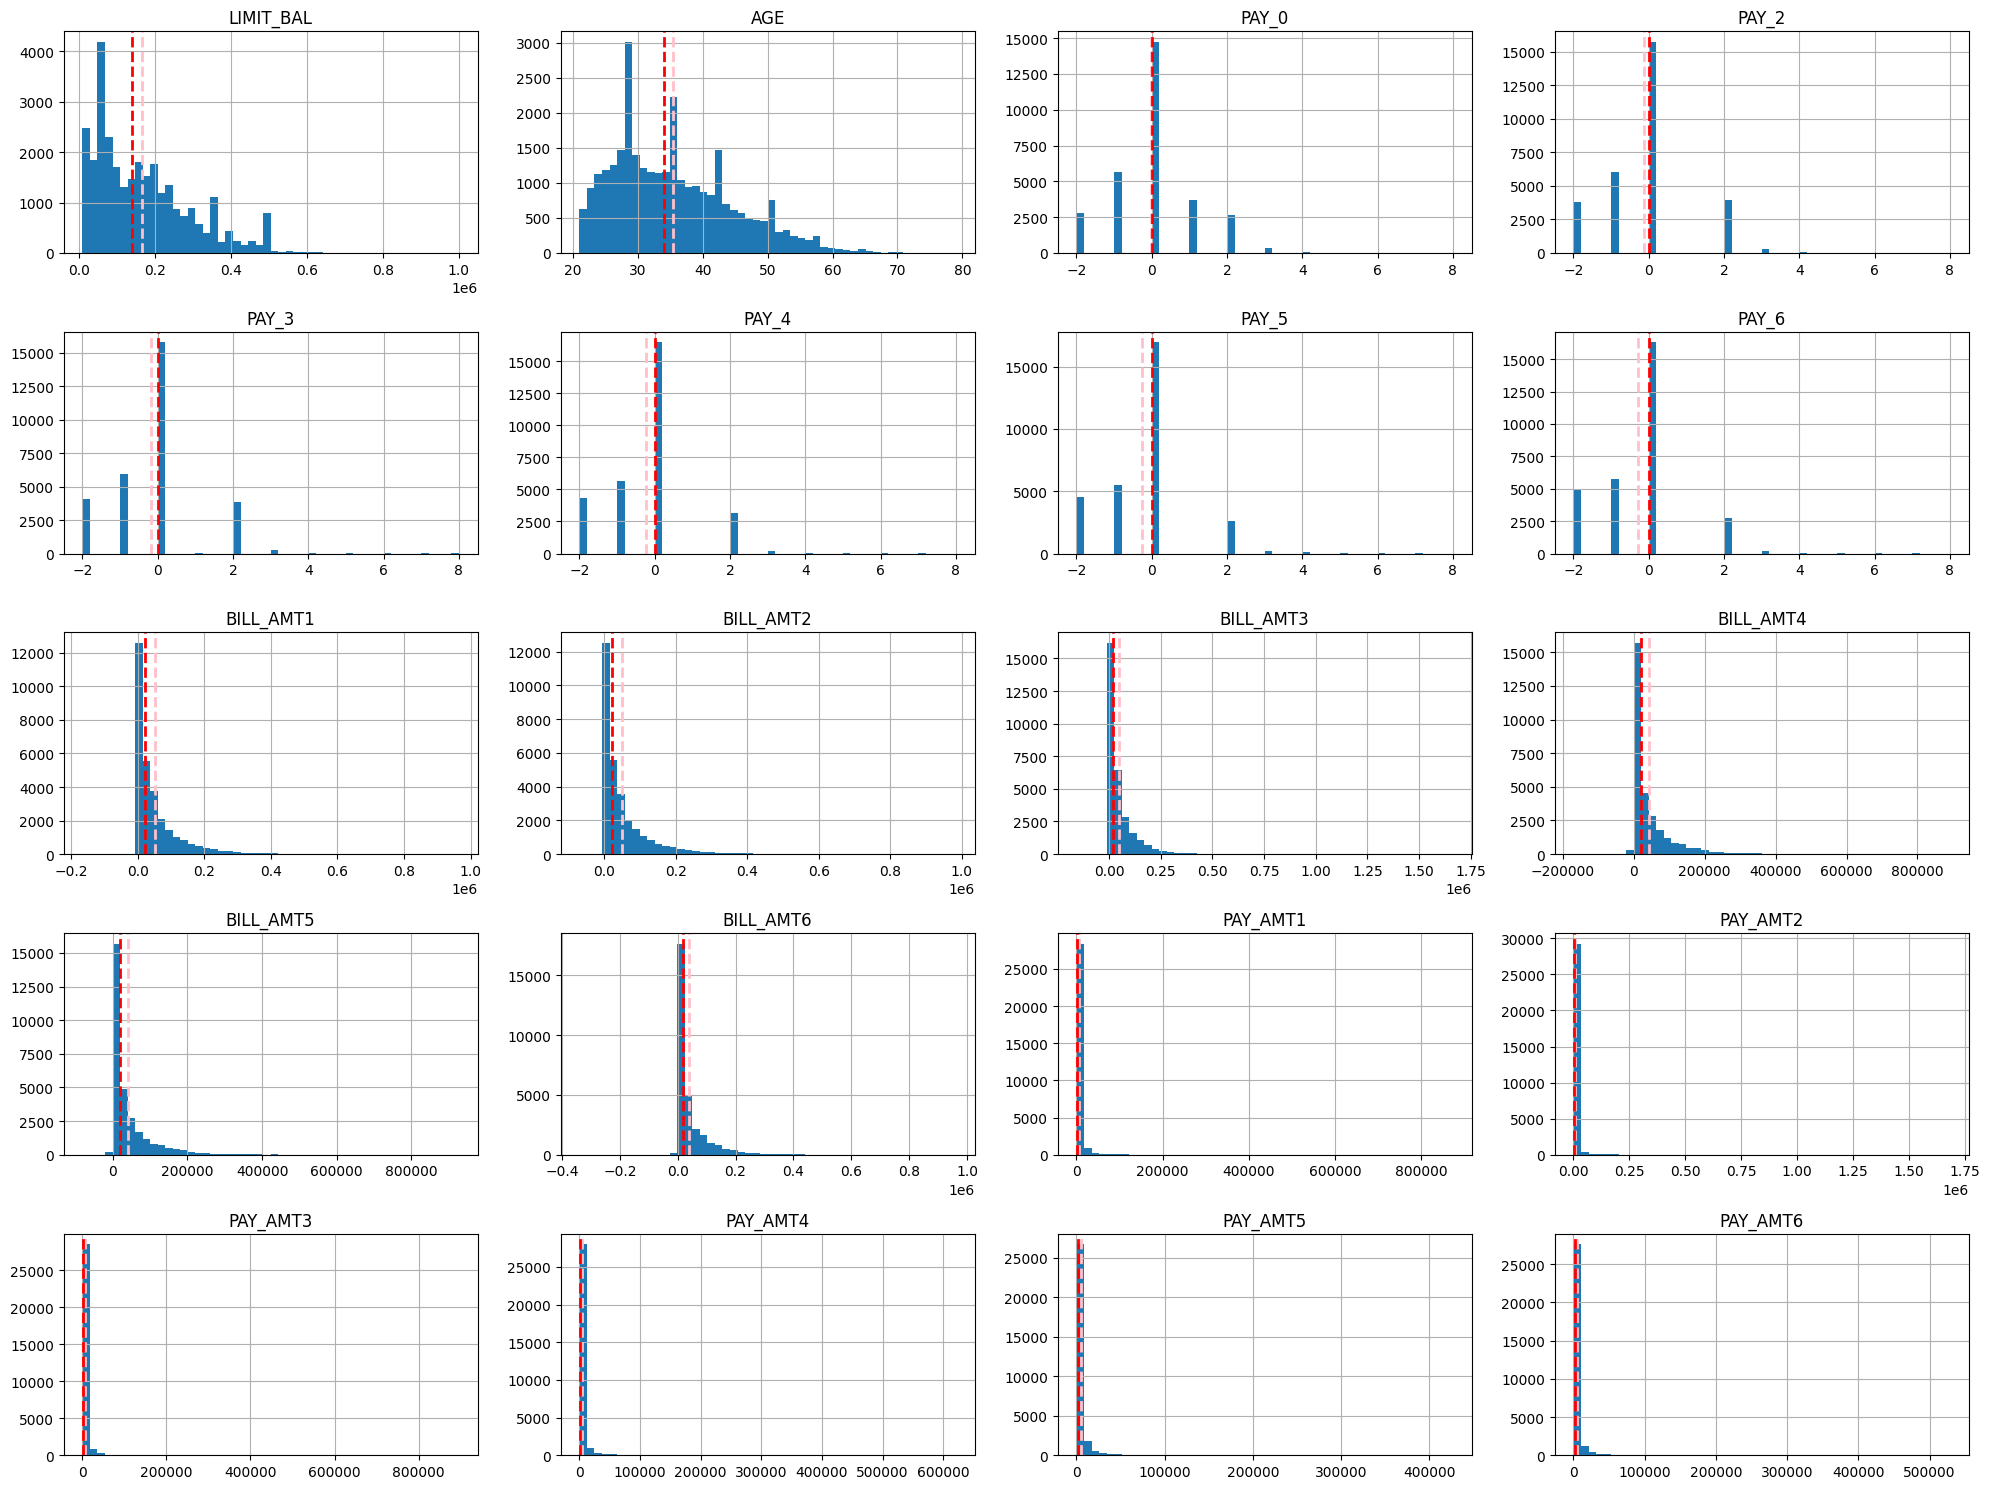

In [24]:
#Checking for distribution of data using histogram
numeric_col = ['LIMIT_BAL', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
rows=5
cols=4
counter=1
fig = plt.figure(figsize=(20,15))
for col in numeric_col:
  plt.subplot(rows,cols,counter)
  ax = fig.gca()
  dataset[col].hist(bins=50, ax = ax)
  ax.axvline(dataset[col].mean(), color = 'pink',linestyle='dashed', linewidth=2)
  ax.axvline(dataset[col].median(), color = 'red',linestyle='dashed', linewidth=2)
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

In [25]:
scaler = MinMaxScaler()
dataset[numeric_col]= scaler.fit_transform(dataset[numeric_col])

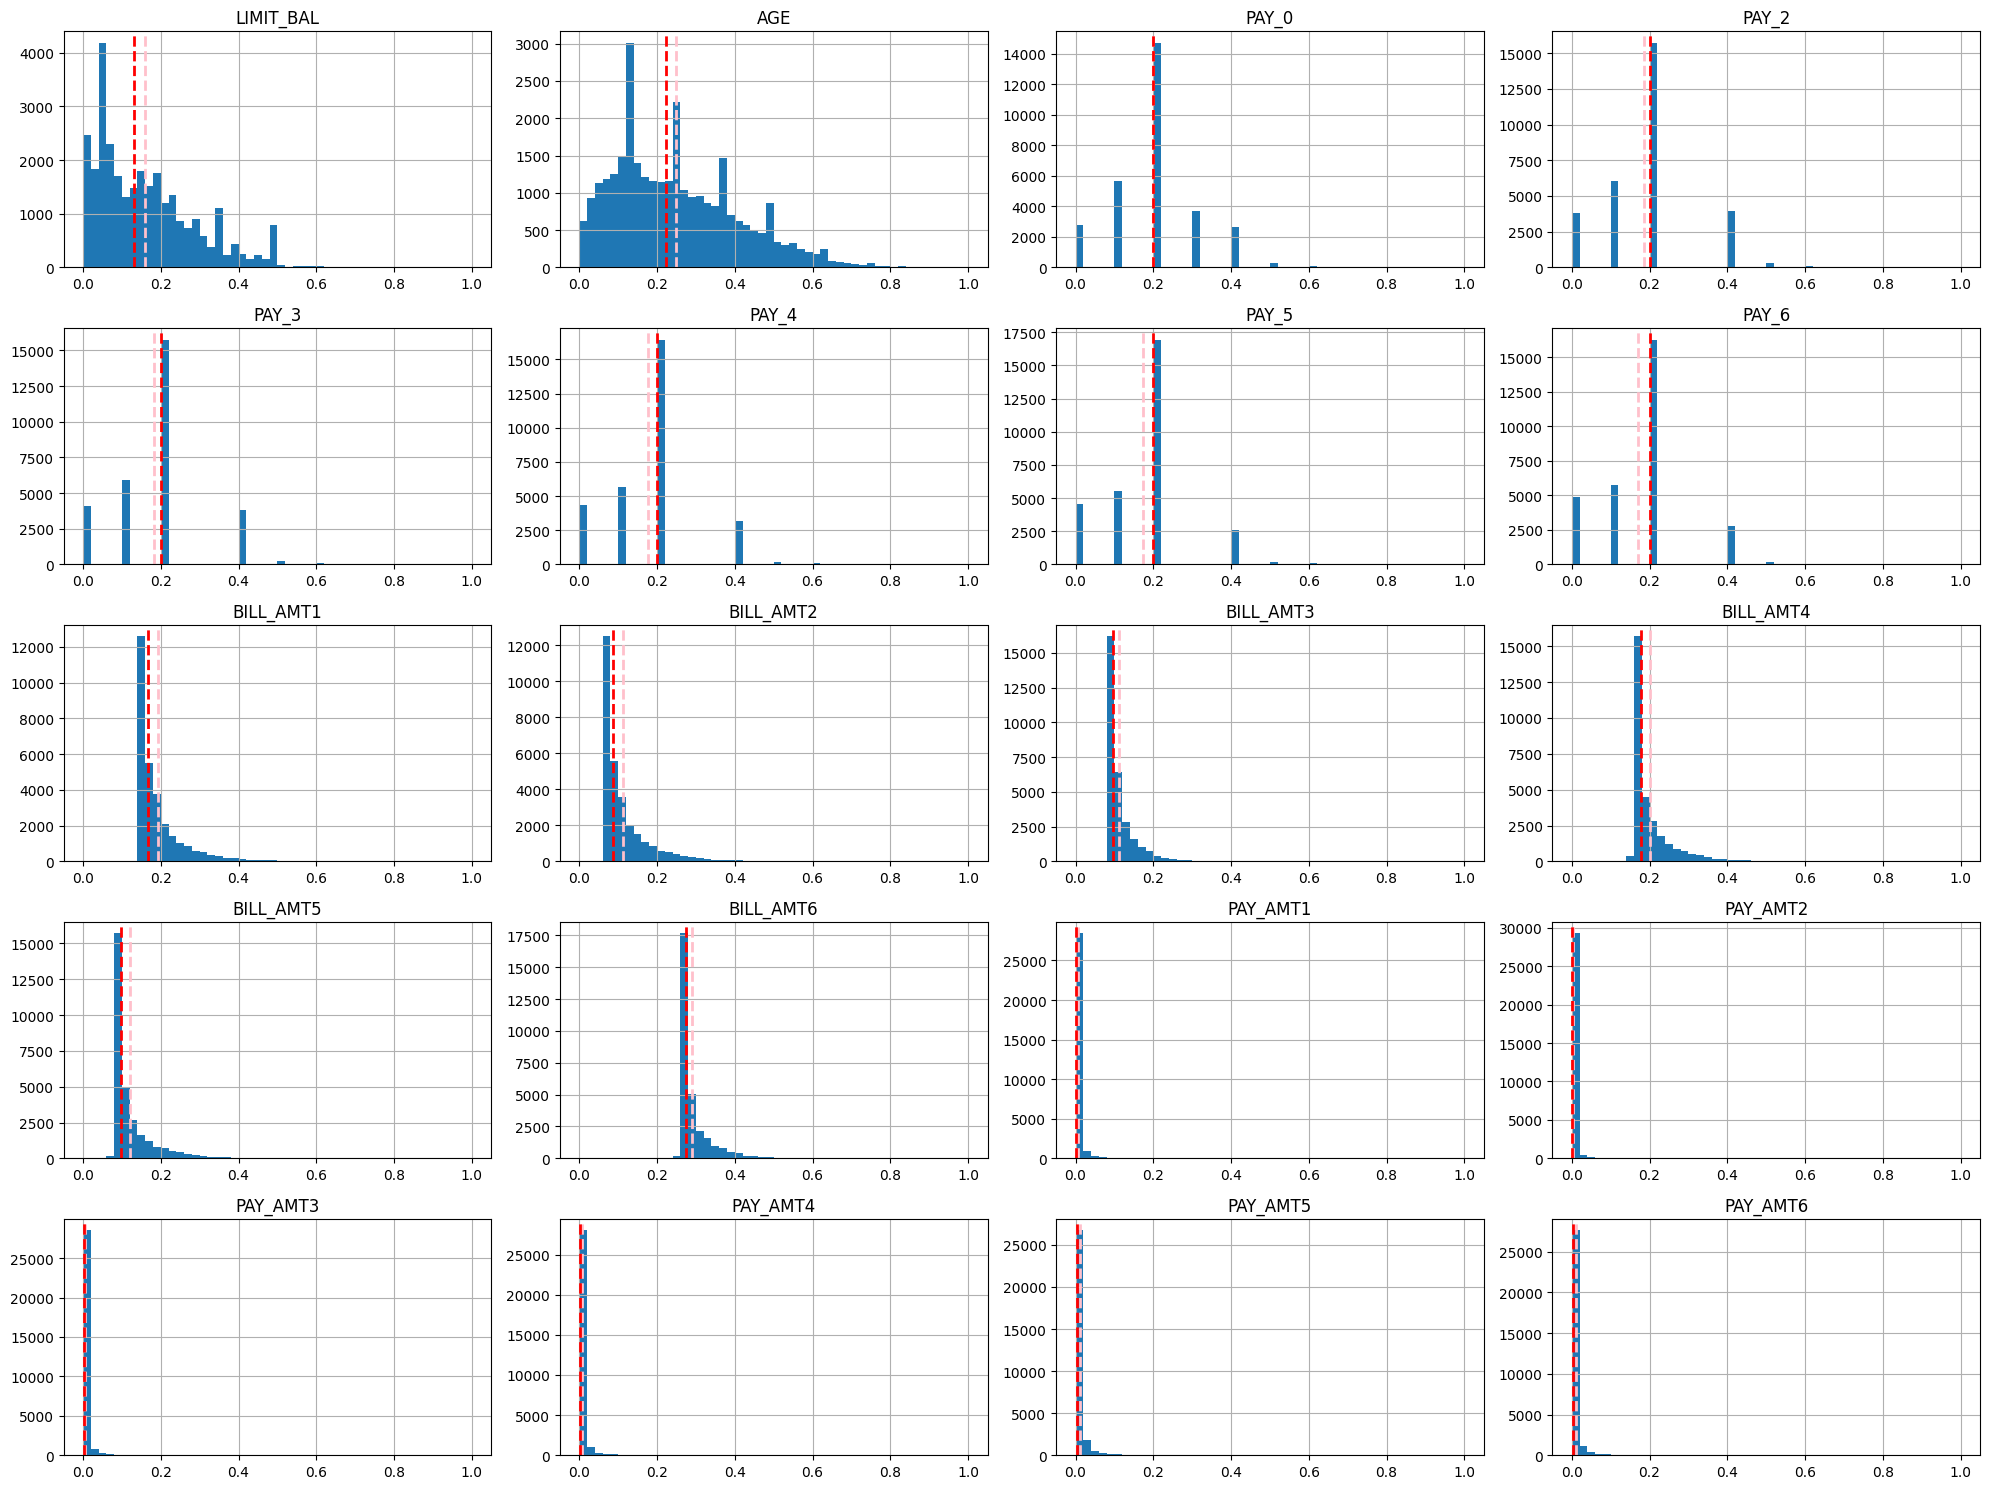

In [26]:
#Again Checking for distribution of data using histogram
rows=5
cols=4
counter=1
fig = plt.figure(figsize=(20,15))
for col in numeric_col:
  plt.subplot(rows,cols,counter)
  ax = fig.gca()
  dataset[col].hist(bins=50, ax = ax)
  ax.axvline(dataset[col].mean(), color = 'pink',linestyle='dashed', linewidth=2)
  ax.axvline(dataset[col].median(), color = 'red',linestyle='dashed', linewidth=2)
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

<b> DATA SPLITTING

In [27]:
X=dataset.drop(['default','Limit_cat','Age_cat','ID'],axis=1)#Dropping categorical variable created during feature engineering
y=dataset['default']


# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 23)
(6000, 23)
(24000,)
(6000,)


In [28]:
train_scaler = StandardScaler()
test_scaler=StandardScaler()

#Fit on data
X_scaled=train_scaler.fit_transform(X)
X_train_scaled=train_scaler.fit_transform(X_train)
X_test_scaled=test_scaler.fit_transform(X_test)

#converting scaled data into dataframe
X_scaled_df=pd.DataFrame(data=X_scaled,columns=X.columns,index=X.index)
X_scaled_train_df=pd.DataFrame(data=X_train_scaled,columns=X_train.columns,index=X_train.index)
X_scaled_test_df=pd.DataFrame(data=X_test_scaled,columns=X_test.columns,index=X_test.index)

In [29]:
X_scaled_df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.21187,-1.068797,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.21187,0.849131,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878


<b> ML MODELS Selection

1. Comparing the models with default hyperparameter values using Cross Validation

In [30]:
models=[LogisticRegression(max_iter=1000), SVC(kernel='linear'),KNeighborsClassifier(), RandomForestClassifier(random_state=0, criterion='entropy', n_estimators=4)]

In [31]:
def compare_models_cross_validation():
  model_scores={}

  for model in models:

    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5)

    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')



In [32]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.808125   0.81270833 0.80395833 0.80416667 0.80708333]
Acccuracy score of the  LogisticRegression(max_iter=1000) = 80.72 %
---------------------------------------------------------------
Cross Validation accuracies for the SVC(kernel='linear') = [0.80770833 0.785625   0.80791667 0.80520833 0.80645833]
Acccuracy score of the  SVC(kernel='linear') = 80.26 %
---------------------------------------------------------------
Cross Validation accuracies for the KNeighborsClassifier() = [0.78520833 0.79583333 0.79645833 0.790625   0.790625  ]
Acccuracy score of the  KNeighborsClassifier() = 79.18 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier(criterion='entropy', n_estimators=4, random_state=0) = [0.79166667 0.80479167 0.795625   0.78958333 0.801875  ]
Acccuracy score of the  RandomForestClassifier(criterion='entropy', n_estimators=4, random_sta

In [36]:
models={

   'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
   'Support Vector':SVC(),
    'Random Forest':RandomForestClassifier(criterion='entropy', n_estimators=4, random_state=0)


}

In [37]:
#Create function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):

  # Dictionary to keep model scores
  models_trained={}
  model_scores={}
  clf_report={}


  #Loop through models
  for name, model in models.items():
    #Fit the model to the data
    model=model.fit(X_train,y_train)
    models_trained[name]=model

    #Evaluate the model and append its accuracy score to model_scores
    model_scores[name]=model.score(X_test,y_test)

    #Predicting with tuned model
    y_preds=model.predict(X_test)

    #Creating classification report and storing it in dictionary
    clf_report[name]=classification_report(y_test,y_preds)

  #Saving all model accuracy scores in dataframe
  model_compare=pd.DataFrame(model_scores,index=['accuracy'])


  return model_scores,model_compare,clf_report, models_trained

In [38]:
#Model implementation using function
model_scores=fit_and_score(models=models,X_train=X_scaled_train_df,X_test=X_scaled_test_df,y_train=y_train,y_test=y_test)

In [39]:
#Printing accuracy score of all the models
pd.DataFrame([model_scores[0]]).rename(index={0: 'Score'})

,Logistic Regression,KNN,Support Vector,Random Forest
Score,0.820833,0.790833,0.825833,0.799333


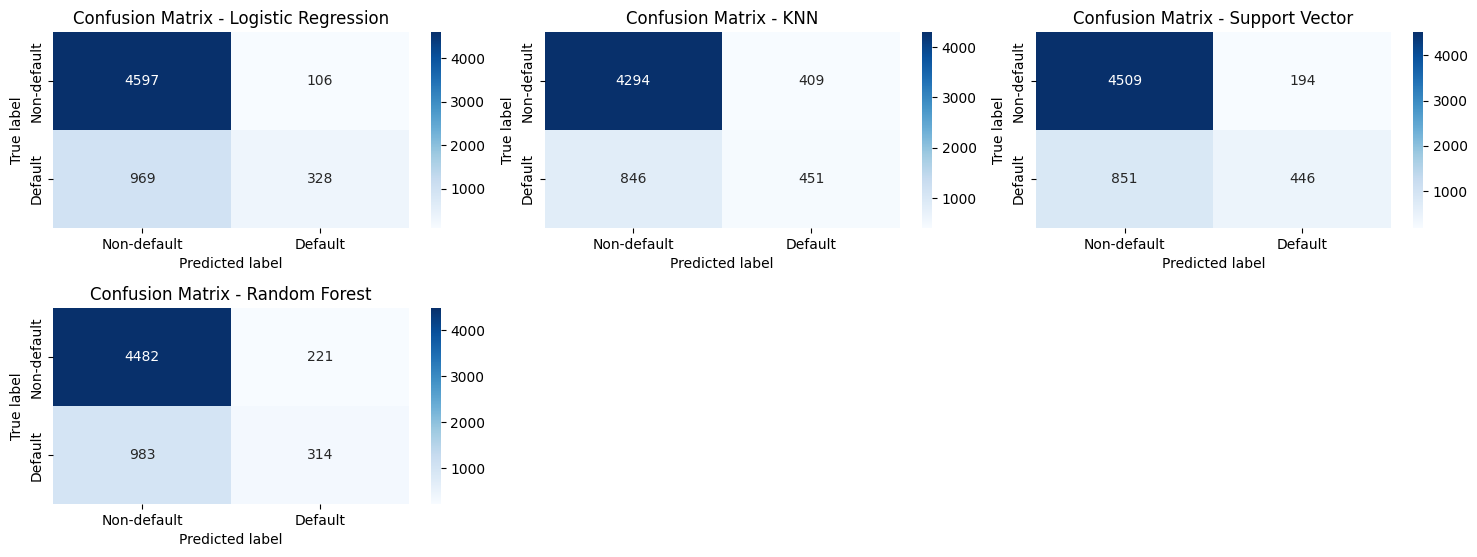

In [40]:
#Confusion matrix for all the implemented models
rows=3
cols=3
counter=1
fig = plt.figure(figsize=(15,8))
for ind,key in enumerate(model_scores[3].keys()):
    y_score = model_scores[3][key].predict(X_scaled_test_df)
    ConfMatrix = confusion_matrix(y_test,y_score)
    plt.subplot(rows,cols,counter)
    sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", xticklabels = ['Non-default', 'Default'], yticklabels = ['Non-default', 'Default'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f"Confusion Matrix - {key}")
    counter=counter+1
    plt.tight_layout()

In [42]:
#Printing classification report of all implemented models
for key in model_scores[2].keys():
  print(f'{key}:\n--------------------------------------------------------- \n---------------------------------------------------------\n{model_scores[2][key]}')


Logistic Regression:
--------------------------------------------------------- 
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      4703
           1       0.76      0.25      0.38      1297

    accuracy                           0.82      6000
   macro avg       0.79      0.62      0.64      6000
weighted avg       0.81      0.82      0.78      6000

KNN:
--------------------------------------------------------- 
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4703
           1       0.52      0.35      0.42      1297

    accuracy                           0.79      6000
   macro avg       0.68      0.63      0.65      6000
weighted avg       0.77      0.79      0.77      6000

Support Vector:
--------------------------------------------------------- 
-----------